## Section 2: Mean-Variance Optimization

In [1]:
# Section 2: Mean-Variance Optimization

import pandas as pd
import numpy as np

df = pd.read_excel('multi_asset_etf_data.xlsx',sheet_name='excess returns')
# excess return
df_tilde = df.set_index('Date')

Problem 1: Summary Statistics

(a) Calculate and display the mean and volatility of each asset’s excess retu

In [3]:
#1a)

# annualize the excess returns
df_tilde_annual = 12 * df_tilde 

# mean excess return
mu_tilde_annual = df_tilde_annual.mean()

# volatility
sigma = df_tilde_annual.std()/np.sqrt(12)

# Sharpe ratio
sharpe_ratio = mu_tilde_annual/sigma

table1 = pd.DataFrame({'Mean':mu_tilde_annual, 'Vol':sigma, 'Sharpe':sharpe_ratio})
table1

,Mean,Vol,Sharpe
BWX,0.020819,0.074304,0.280189
DBC,0.010053,0.177327,0.056689
EEM,0.093103,0.196190,0.474556
EFA,0.099239,0.161319,0.615174
HYG,0.081193,0.085989,0.944231
IEF,0.033424,0.056895,0.587473
IYR,0.164311,0.180085,0.912408
PSP,0.170243,0.213412,0.797721
QAI,0.027795,0.047800,0.581490
SPY,0.164907,0.139166,1.184963


(b)  Which assets have the best and worst Sharpe ratios?

In [4]:
#1b)
# best Sharpe ratio
best_Sharpe_asset = table1['Sharpe'].idxmax()

# worst Sharpe ratio
worst_Sharpe_asset = table1['Sharpe'].idxmin()

print('The asset with the best Sharpe ratio is: ' + best_Sharpe_asset)
print('The asset with the best Sharpe ratio is: ' + worst_Sharpe_asset)

The asset with the best Sharpe ratio is: SPY
The asset with the best Sharpe ratio is: DBC


Problem 2: Descriptive Analysis

a) Calculate the correlation matrix of the returns.  Which pair has the highest correlation?And the lowest

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,NaN,0.437619,0.608377,0.552190,0.479980,0.235399,0.397112,0.456009,0.605444,0.373806,0.526797
DBC,0.437619,NaN,0.619991,0.634630,0.530205,-0.379698,0.321818,0.575219,0.617904,0.574377,0.137627
EEM,0.608377,0.619991,NaN,0.854021,0.748341,-0.311420,0.614140,0.804353,0.805874,0.757758,0.221171
EFA,0.552190,0.634630,0.854021,NaN,0.750992,-0.378969,0.666056,0.908241,0.830229,0.873131,0.138746
HYG,0.479980,0.530205,0.748341,0.750992,NaN,-0.237206,0.757550,0.820091,0.745370,0.746024,0.208048
IEF,0.235399,-0.379698,-0.311420,-0.378969,-0.237206,NaN,-0.079125,-0.404348,-0.161356,-0.419998,0.649038
IYR,0.397112,0.321818,0.614140,0.666056,0.757550,-0.079125,NaN,0.734348,0.601285,0.716066,0.283457
PSP,0.456009,0.575219,0.804353,0.908241,0.820091,-0.404348,0.734348,NaN,0.810628,0.894176,0.135455
QAI,0.605444,0.617904,0.805874,0.830229,0.745370,-0.161356,0.601285,0.810628,NaN,0.820112,0.337546
SPY,0.373806,0.574377,0.757758,0.873131,0.746024,-0.419998,0.716066,0.894176,0.820112,NaN,0.103265


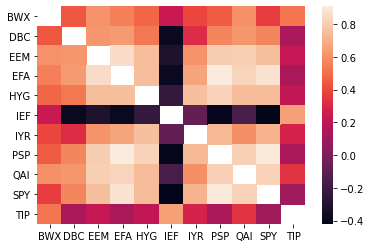

In [5]:
#2a) 
import seaborn as sns

# Correlation matrix
corrmat = df_tilde_annual.corr()

# ignore self-correlation
corrmat[corrmat==1] = None

sns.heatmap(corrmat)
corrmat

b) How well have TIPS done in our sample?  Have they outperformed domestic bonds?  Foreignbonds?

Solution: TIPS has outperformed domestic bonds (IEF) and foreign bonds (BWX). We can conclude this by looking at their Sharpe Ratios. TIP = 0.824, IEF = 0.58, BWX = 0.280

c) Based on the data, do TIPS seem to expand the investment opportunity set, implying thatHarvard should consider them as a separate asset?

Solution: Based off of the above correlation matrix, TIP has a 0.64 correlation with IEF and a 0.527 correlation with BWX. Since both of these correlations are high, we can conclude that TIP is not a seprate asset. While it does perform better, it does not appear to be a seperate asset. 

Problem 3: The MV frontier

a) Compute and display the weights of the tangency portfolio: w^{tan}

In [6]:
#3a) 
# compute and display the weights of the tangency portfolio

def compute_tangency(df_tilde):

    #variance-covariance matrix
    Sigma = df_tilde.cov()

    # N is the number of assets
    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    mu_tilde = df_tilde.mean()
    Sigma_inv = np.linalg.inv(Sigma_adj)
    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    omega_tangency = pd.Series(weights, index=mu_tilde.index)

    return omega_tangency, mu_tilde, Sigma

omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde_annual)

omega_tangency

BWX   -0.259236
DBC   -0.049786
EEM    0.068120
EFA   -0.157671
HYG    0.775635
IEF    1.734962
IYR   -0.366667
PSP   -0.000685
QAI   -2.477194
SPY    1.540749
TIP    0.191773
dtype: float64

3b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio

In [7]:
#3b)
# compute the mean, volatility, and Sharpe ratio for the tangency portfolio

# mean
mean_tangency = mu_tilde @ omega_tangency

# volatility
vol_tangency = np.sqrt(omega_tangency @ Sigma @ omega_tangency)/np.sqrt(12)

# Sharpe ratio
sharpe_tangency = mean_tangency/vol_tangency

print('For the tangency Portfolio, Mean: ' + str(mean_tangency) + ', Volatility: ' + str(vol_tangency)
     + ', Sharpe Ratio: ' + str(sharpe_tangency))

For the tangency Portfolio, Mean: 0.2377671633954933, Volatility: 0.10480197847812664, Sharpe Ratio: 2.2687278126635557


Problem 4: The allocation

a)  Compute and display the weights of MV portfolios with target returns of ̃μ^p=.01.

In [8]:
# 4a)

# Compute and display the weights of MV portfolios with target returns=0.01

def target_mv_portfolio(df_tilde, target_return):

    omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde, diagonalize_Sigma=diagonalize_Sigma)
    Sigma_adj = Sigma.copy()

    Sigma_inv = np.linalg.inv(Sigma_adj)
    N = Sigma_adj.shape[0]
    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu_tilde)/(mu_tilde @ Sigma_inv @ mu_tilde)) * target_return

    omega_star = delta_tilde * omega_tangency

    return omega_star

# TODO: Annualized target return in footnote is not up to date

omega_star = target_mv_portfolio(df_tilde_annual, target_return=0.01 * 12)

omega_star

BWX   -0.130835
DBC   -0.025127
EEM    0.034380
EFA   -0.079576
HYG    0.391459
IEF    0.875628
IYR   -0.185055
PSP   -0.000346
QAI   -1.250228
SPY    0.777609
TIP    0.096787
dtype: float64

In [9]:
# fraction in the assets, the rest invested in risk-free rate
omega_star.sum()

0.5046954267625108

b) What is the mean, volatility, and Sharpe ratio for w^p?

In [10]:
#4b)
# compute the mean, volatility, and Sharpe ratio for the omega_star

# mean 
mean = mu_tilde @ omega_star

# volatlity
vol = np.sqrt(omega_star @ Sigma @ omega_star)/np.sqrt(12)

# Sharpe ratio
sharpe_ratio = mean/vol

print('For the portfolio with the target excess returns 0.01, Mean: ' + str(mean) 
      + ', Volatility: ' + str(vol)
     + ', Sharpe Ratio: ' + str(sharpe_ratio))

For the portfolio with the target excess returns 0.01, Mean: 0.12000000000000006, Volatility: 0.05289307925357357, Sharpe Ratio: 2.2687278126635557


c) Discuss the allocation.  In which assets is the portfolio most long?  And s

QAI   -1.250228
IYR   -0.185055
BWX   -0.130835
EFA   -0.079576
DBC   -0.025127
PSP   -0.000346
EEM    0.034380
TIP    0.096787
HYG    0.391459
SPY    0.777609
IEF    0.875628
dtype: float64
The portfolio most long is IEF.
The portfolio most short is QAI.


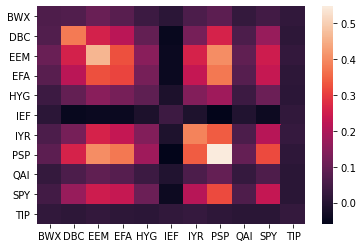

In [34]:
#4c) 
# most long and short
sorted_omega_star = omega_star.sort_values()
print(sorted_omega_star)

sns.heatmap(Sigma)

# most long: IEF : low covariance
# most short: QAI

print('The portfolio most long is '+ sorted_omega_star.idxmax()+'.')
print('The portfolio most short is '+ sorted_omega_star.idxmin()+'.')

d)
No, it does not. SPY has the strongest sharpe ratio and is the second most long. Furthermore, QAI is the most short, however it does not have the worst Sharpe Ratio. MV solutions puts weight to the assets according to the covariances, and given the variance-covariance matrix heatmap above, we can see that IEF has an overall lowest covatiance with the other assets.

Problem 5: Simple Portfolios

a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale theentire  weighting  vector  to  have  target  mean ̃μ=.01. Report  its  mean,  volatility,  andSharpe ratio.

In [13]:
#5a)
N = Sigma.shape[0]

# Equal weight
equal_weight = np.empty(N)
equal_weight.fill(1/N)

mean_eqw = mu_tilde @ equal_weight

vol_eqw = np.sqrt(equal_weight @ Sigma @ equal_weight) / np.sqrt(12)

sharpe_eqw = mean_eqw/vol_eqw

print('For the equally-weighted portfolio, Mean: ' + str(mean_eqw) + ', Volatility:' + str(vol_eqw)
     + ', Sharpe-ratio: ' + str(sharpe_eqw))

# Rescale
scaler = 0.01 * 12 # annualize the target returns
rescaled_weight = equal_weight / (mean_eqw/scaler)

mean_rescaled = mu_tilde @ rescaled_weight

vol_rescaled = np.sqrt(rescaled_weight @ Sigma @ rescaled_weight) / np.sqrt(12)

sharpe_rescaled = mean_rescaled/vol_rescaled

print('For the rescaled-weighting portfolio, Mean: ' + str(mean_rescaled) + ', Volatility:' + str(vol_rescaled)
     + ', Sharpe-ratio: ' + str(sharpe_rescaled))

For the equally-weighted portfolio, Mean: 0.0820299518246152, Volatility:0.09813252126465091, Sharpe-ratio: 0.8359099589767073
For the rescaled-weighting portfolio, Mean: 0.12000000000000002, Volatility:0.14355613150835042, Sharpe-ratio: 0.8359099589767075


b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is aterm used in a variety of ways, but here we have in mind setting the weight of the portfolioto be proportional to the inverse of its full-sample volatility estimate. You will need to rescale it to have a target meanof ̃μ=.01.

In [14]:
#5b)
# risk-parity portfolio
risk_parity_weight = 1/sigma

mean_rp = mu_tilde @ risk_parity_weight

vol_rp = np.sqrt(risk_parity_weight @ Sigma @ risk_parity_weight) / np.sqrt(12)

sharpe_rp = mean_rp/vol_rp

print('For the \'risk-parity\' portfolio, Mean: ' + str(mean_rp) + ', Volatility:' + str(vol_rp)
     + ', Sharpe-ratio: ' + str(sharpe_rp))

# rescale

scaler = 0.01 * 12 # annualize the target returns
rp_rescaled_weight = risk_parity_weight / (mean_rp/scaler)

mean_rp_rescaled = mu_tilde @ rp_rescaled_weight

vol_rp_rescaled = np.sqrt(rp_rescaled_weight @ Sigma @ rp_rescaled_weight) / np.sqrt(12)

sharpe_rp_rescaled = mean_rp_rescaled/vol_rp_rescaled

print('For the rescaled \'risk-parity\' portfolio, Mean: ' + str(mean_rp_rescaled) 
      + ', Volatility:' + str(vol_rp_rescaled)
     + ', Sharpe-ratio: ' + str(sharpe_rp_rescaled))

For the 'risk-parity' portfolio, Mean: 7.2597285624445504, Volatility:7.765036238138095, Sharpe-ratio: 0.9349252649702111
For the rescaled 'risk-parity' portfolio, Mean: 0.12, Volatility:0.12835250527091432, Sharpe-ratio: 0.9349252649702111


c)

Sharpe Ratio of the rescaled 'risk-parity' portfolio is higher than that of the MV portfolio in 2.4

Problem 6: Out-of-Sample Performanc

a) Using only data through the end of 2020,  compute w^p for ̃μ^p=.01,  allocating to all 11assets.

In [16]:
#6a)

df_temp = df_tilde_annual.loc[:'2020', :]

omega_tangency_1, mu_tilde_1, Sigma_1 = compute_tangency(df_temp)

omega_star_1 = target_mv_portfolio(df_temp, target_return=0.01*12)

omega_star_1

BWX   -0.039015
DBC   -0.070831
EEM    0.027148
EFA   -0.076195
HYG    0.461413
IEF    0.844823
IYR   -0.209008
PSP   -0.024835
QAI   -1.197772
SPY    0.785429
TIP    0.056842
dtype: float64

b)  Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the end of 2020

In [17]:
#6b)

# Performance of 2020

mean_1 = omega_star_1 @ mu_tilde_1

vol_1 = np.sqrt(omega_star_1 @ Sigma_1 @ omega_star_1)/np.sqrt(12)

sharpe_ratio_in_sample = mean_1/vol_1

sharpe_ratio_in_sample

2.28985281394002

c)  Again  using  those  weights,  (derived  using  data  through  2020,)  calculate  the  portfolio’s Sharpe ratio based on performance in 202

In [18]:
#6c)

# with weights above, calculate performance of 2021

df_temp_1 = df_tilde_annual.loc['2021':, :]

omega_tangency_2, mu_tilde_2, Sigma_2 = compute_tangency(df_temp_1)

mean_2 = omega_star_1 @ mu_tilde_2

vol_2 = np.sqrt(omega_star_1 @ Sigma_2 @ omega_star_1)/np.sqrt(12)

sharpe_ratio_out_of_sample = mean_2/vol_2

sharpe_ratio_out_of_sample

1.5096849087307802

**Reference: Solutions to HW1_2020